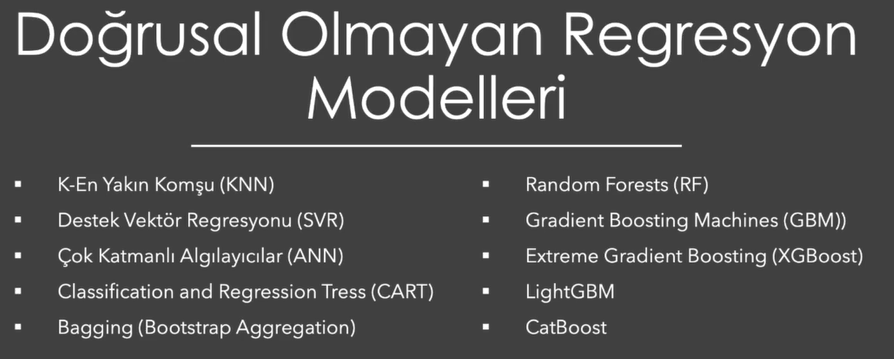

# K-En Yakın Komşu(KNN)

tahminler gözlem benzerligine göre yapılır.(bana arkadaşını söyle sana kim oldugunu söyleyeyim.)

paremetriktir

uygulması kolaydır 

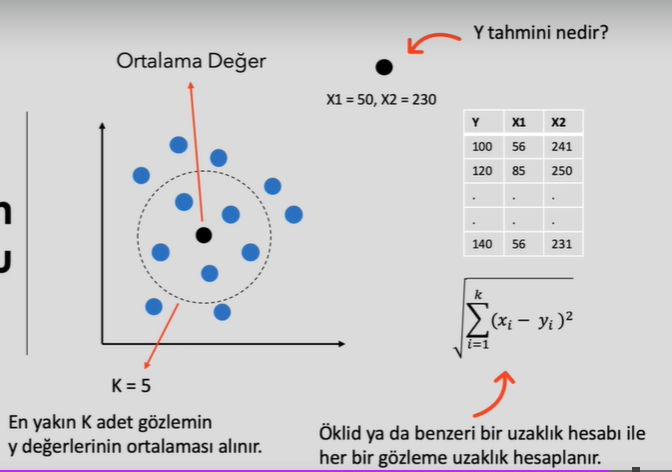

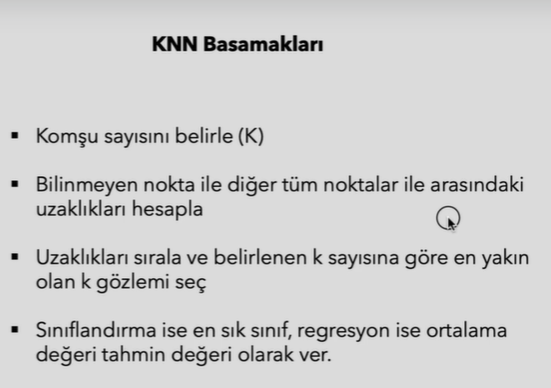

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
knn_model=KNeighborsRegressor().fit(X_train,y_train)

In [5]:
knn_model

KNeighborsRegressor()

In [6]:
knn_model.n_neighbors#hiper paramtersi komşuluk sayısıdır ,farklı k komşuluk sayılarına karşılık farklı degerler verir

5

# Tahmin

In [7]:
y_pred=knn_model.predict(X_test)
#X_train=>egitim setine yönlik y tahmin degerleri üreteçek 
#X_test=>y tahmin degerlerini üretecek 
#y_pred =>olarak ise test hatasını hesaplayabiliriz


In [8]:
np.sqrt(mean_squared_error(y_test,y_pred))

426.6570764525201

In [10]:
#bu kod blogunu sadece egitim üzerinde bir hata gözlmelemek için yapıcaz 
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)


k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.64671325413764
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


# Model Tuning

GridSearchCV=>ızgara gibi anlamı vardır ,olası bir parametre seti verilip tüm olası kombinasyonların denenmesi anlamına gelir,birbirleri ile çarpılaştırarak yapılır 

In [11]:
from sklearn.model_selection import GridSearchCV

In [13]:
knn_params={'n_neighbors':np.arange(1,30,1)}
#np.arange(1,30,1)=>1 den 30 a kadar k degerleri ürettik 

In [14]:
knn=KNeighborsRegressor()

In [17]:
knn_cv_model=GridSearchCV(knn,knn_params,cv=10)
#knn modelin nesnesini tanımlamış olduk,daha sonra fit yapma işlemi yapmamız gerekiyor 
#knn_params=>deneneçek olan parametreler 
#cv=>kaç katlı cross validation yapmak istiyoruz 

In [18]:
knn_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [20]:
#tüm parametreleri bize buldu,bu paramtreler içinde en uygun olanı bulmak için
#en uygunu 8 miş
knn_cv_model.best_params_["n_neighbors"]

8

In [21]:
#yukarıdakinin farklı versiyonuna bakalım
#valide edilmiş ve valide edilmemiş iki versiyonu gözlem yapalım 
RMSE = [] 
RMSE_CV=[]

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.64671325413764
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


birinci görünen ifadeler hata kareler degerinin ortalamasının karekökü degerleri,bunlar test ve train üzerinde direk yapılan hesaplamalar,ikinci tarafta görünen ise
valide edilmiş model üzerinden elde edilen train hataları

egitim üzerinde olacak olan hata degerlendirmesini ve nihayetinde kuracak olup degerlendirmek için kullanacagımız test hatası için valide edilmiş model üzerinden yapmak gerekiyor 

In [25]:
knn_tuned=KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"])
#tune edilmiş modelin nesnesini oluşturduk 

In [26]:
knn_tuned.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [27]:
np.sqrt(mean_squared_error(y_test,knn_tuned.predict(X_test)))
#tune edilmiş knn modeli elde edilmiş test hatasını verir

413.7094731463598

# Destek Vektör Regresyonu (SVR)

amaç,bir marjin aralıgında maksimum noktayı en küçük hata ile alabilecek şekilde dogru ya da egriyi belirlemektir

aykırıklara daha dayanklı,robas regresyon modeli olarak da anılmaktadır 

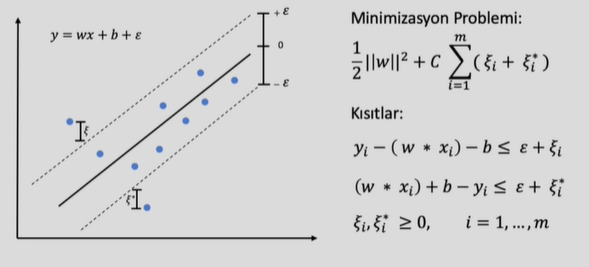

çizgi çizgi olanlar ksi degerleri,aykırı degerleri ifade eder
c degerleri ceza degerlerini ifade eder
artıklar üzerinden bir kontrol mekanizması işletmş oluyoruz 

kısıtlar ise;öyle bir regresyon degeri bulmana yardımcı olacagım ki gerçek degerler ile tahmin edilen degerler arasındaki farklar regersyon egrisinin 2 yönünden belirli bir epsilon ve ksi degerinden daha uzakta olmayacak  

çizginin dışındaki noktalar regresyon çizgisini(ortadaki çizgiyi)belirleyenlerin ta kendisi oluyor

In [118]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

## Dogrusal SVR

In [82]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [67]:
from sklearn.svm import SVR

In [84]:
svr_model = SVR("linear").fit(X_train, y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass kernel=linear as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [85]:
svr_model.predict(X_train)[0:5]#bagımlı degişkenin tahmin edilen degerleri 

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [86]:
print("y={0}+{1}x".format(svr_model.intercept_[0],  
                   svr_model.coef_[0][0]))

#model denklemi ile tahmin degerini oluşturduk 
#svr_model.intercept_[0]=>svr içinden sabiti aldık
#svr_model.coef_[0][0]=>beta1 katsayısını aldık,iki parentez sebebi ise arrayden kurtarmak için

y=-48.69756097561513+4.969512195122093x


In [87]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [88]:
-48.7+5*91#yüksek oranda dogru oldugunu görebiliyoruz

406.3

In [89]:
y_pred = svr_model.predict(X_train)

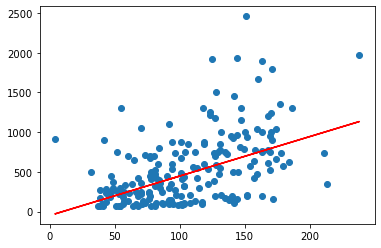

In [90]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")
#basit svr ın geometrik gösterimi

In [92]:
from sklearn.linear_model import LinearRegression
lm_model=LinearRegression().fit(X_train,y_train)
lm_pred=lm_model.predict(X_train)
print("y={0}+{1} x".format(lm_model.intercept_,lm_model.coef_[0]))

y=-8.814095480334572+5.1724561354706875 x


### iki modelide birleştirelim

Text(0, 0.5, 'Maaş(Salary)')

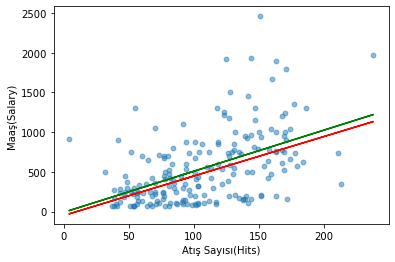

In [94]:
plt.scatter(X_train,y_train,alpha=0.5,s=23)
plt.plot(X_train,lm_pred,'g')
plt.plot(X_train,y_pred,color="r")

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş(Salary)")

dogrusal model/regresyon modeli burada yeşil renkli(lm_pred)
svr modelinin tahmin degerleri burada kırmızı

svr daha aşagıda olma sebebi svr robastır,yani aykırı gözlemler svr çizgisini yukarı çekmeye çalışır ama 
svr direnci yüksek oldugu için biraz daha aşagıdadır
yeşil ise aykırı gözlemlerden daha çok etkilenir 

# Tahmin

In [95]:
#svr tahmin formülü
print("y={0}+{1} x".format(svr_model.intercept_[0],svr_model.coef_[0][0]))

y=-48.69756097561513+4.969512195122093 x


In [101]:
svr_model.predict([[91]])#önceki örnek için fonksiyonla yaparsak 

array([403.52804878])

In [102]:
#test hatasını hesaplarsak
y_pred=svr_model.predict(X_test)

In [104]:
np.sqrt(mean_squared_error(X_test,y_pred))#tune edilmemiş modelin test hatasıdır 

439.6853326219471

# Model Tuning

In [106]:
svr_model

SVR(kernel='linear')

In [119]:
svr_params={"C":np.arange(0.1,2,0.1)}#0.1'den,2'ye kadar 0.1 artış ile arama yap
svr_cv_model=GridSearchCV(svr_model,svr_params,cv=10).fit(X_train,y_train)

In [120]:
pd.Series(svr_cv_model.best_params_)[0]

0.4

In [113]:
svr_tuned=SVR("linear",
              C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,y_train)
#parametreyi vermiş olduk 

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass kernel=linear as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [114]:
#tune edilmiş tahmin üzerinden bunu kayıt edip test hatamızı hesap edicez

In [116]:
y_pred=svr_tuned.predict(X_test)

In [117]:
np.sqrt(mean_squared_error(X_test,y_pred))

433.50582685399695

In [123]:
np.sqrt(mean_squared_error(y_test,y_pred))

458.198966781116

# Dogrusal Olmayan SVR

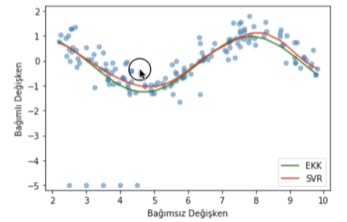

In [125]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [126]:
svr_rbf=SVR("rbf").fit(X_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass kernel=rbf as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


# Tahmin

In [127]:
svr_rbf.predict(X_test)

array([467.17641555, 446.40313543, 478.61634896, 407.90736132,
       478.21333994, 417.12254646, 409.5369652 , 406.6833667 ,
       475.87387807, 472.35514043, 437.62371823, 470.87017269,
       475.61088446, 409.98015887, 417.76687494, 478.43331711,
       433.90433249, 405.3784308 , 449.34132456, 417.20961012,
       467.52126683, 429.7970886 , 429.27433039, 425.64037296,
       419.74184952, 403.04020294, 478.12867963, 419.46502593,
       467.98640388, 405.00840939, 404.35642525, 402.66487856,
       443.78645366, 412.97944034, 411.32083923, 478.8961275 ,
       471.79125748, 410.33130924, 403.32692238, 426.9544654 ,
       403.64557418, 404.74733617, 454.74782229, 433.10191289,
       478.70972915, 459.9497864 , 477.55417184, 405.01026337,
       408.92637939, 426.28903835, 472.7745124 , 446.66776352,
       441.59170843, 412.58392272, 406.04166734, 438.41225906,
       451.95520339, 476.94220443, 407.53571839, 475.58095683,
       472.51311483, 420.0614604 , 453.93699692, 421.10

In [128]:
np.sqrt(mean_squared_error(y_test,y_pred))

458.198966781116

# model tuning

In [129]:
svr_rbf

SVR()

In [132]:
svr_params={"C":[0.1,0.4,5,10,20,30,40,50]}
svr_cv_model=GridSearchCV(svr_rbf,svr_params,cv=10)
svr_cv_model.fit(X_train,y_train)
#bize parametreleri verdi

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [134]:
# en iyi parametreyi seçelim
svr_cv_model.best_params_

{'C': 50}

In [135]:
#final modelimeze bakalım
pd.Series(svr_cv_model.best_params_)[0]

50

In [138]:
svr_tuned=SVR("rbf",C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass kernel=rbf as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [139]:
#test hatamızı hesaplamsını yapalım
y_pred=svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

428.00406888095694

In [140]:
#her zaman en yeni algoritma en iyi olacagı anlamına gelmez bu yanılgıya düşme 